# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

## Масштабирование признаков

В машинном обучении при работе с линейными моделями полезной является практика _масштабирования признаков_. Многие методы машинного обучения, в том числе и линейные, наиболее эффективны в том случае, когда признаки имеют одинаковый масштаб. По сути масштабирование означает приведение признаков к какой-то единой шкале. 

Существует большое количество методов масштабирования, наиболее популярными из которых являются _нормализация_ и _стандартизация_.

Метод нормализации заколючается в приведении признаков к масштабу в диапазоне [0-1].

Для его реализации необходимо найти минимальное $min_{j} (x^{j}_{i})$ и максимальное $max_{j} (x^{j}_{i})$ значение признака на обучающей выборке. При этом отмасштабированное значение признака будет находиться по формуле

$$x^{j}_{i} = \frac{x^{j}_{i} - min_{j} (x^{j}_{i})}{max_{j} (x^{j}_{i})-min_{j} (x^{j}_{i})}.$$

После преобразования значений признаков минимальное значение превратится в 0, а максимальное - в 1.

Стандартизация заключается в получении своего рода значения сдвига каждого признака от среднего. Для ее реализации необходимо вычислить среднее значение признака 

$$\mu_{j} = \frac{1}{l}\sum^{l}_{i=1}x^{j}_{i}$$

и стандартное отклонение, которое находится путем суммирования квадратов отклонения значений признака на объектах выборки от среднего $\mu_{j}$ и делением на число объектов выборки с последующим извлечением корня:

$$\sigma_{j} = \sqrt{\frac{1}{l}\sum^{l}_{i=1}(x^{j}_{i}-\mu_{j})^{2}}$$

Чтобы отмасштабировать признак, каждое его значение преобразуется по формуле

$$x^{j}_{i}=\frac{x^{j}_{i} - \mu_{j}}{\sigma_{j}}.$$

Масштабирование является важным этапом подготовки данных перед применением методов машинного обучения. 

Важным и последним свойством масштабирования является факт, что после масштабирования признаков в линейных моделях веса при них могут интерпретироваться как мера значимости этих признаков.

Существуют различные ситуации, когда целесообразно применять тот или иной метод масштабирования. Нормализовать полезно признаки, опирающиеся на величину значений - такие как расстояние. Стандартизировать полезно признаки для модели, которая опирается на распределение. В общем случае, когда выбор метода неочевиден, полезной практикой считается создавать масштабированные копии набора данных, с которыми работает специалист, и сравнивать друг с другом полученные после применения модели результаты для выявления оптимального метода масштабирования для имеющейся ситуации.

---

* Нормализация

$$x^{j}_{i} = \frac{x^{j}_{i} - min_{j} (x^{j}_{i})}{max_{j} (x^{j}_{i})-min_{j} (x^{j}_{i})}.$$

* Стандартизация

$$x^{j}_{i}=\frac{x^{j}_{i} - \mu_{j}}{\sigma_{j}}.$$

Нормализовать полезно признаки, опирающиеся на величину значений - такие как расстояние. Стандартизировать полезно признаки для модели, которая опирается на распределение. 

Для нормализации: изображение, значение пикселя от 0 до 255

Для стандартизации: концентрация эритроцитов в крови - порога верхнего нет, нельзя использовать нормализацию.

---

__Пример:__

In [91]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [92]:
# сгенерируем набор данных с сильным зашумлением
data1, target, coef = datasets.make_regression(n_samples=100, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [93]:
# изменили масштаб данных
data1[:,0] = data1[:,0]*10

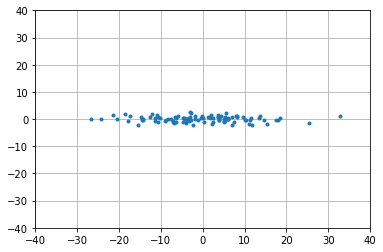

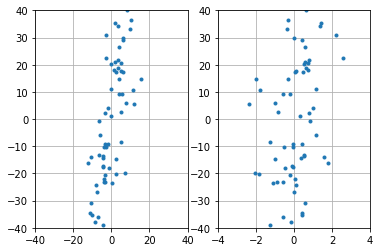

In [94]:
plt.plot(data1[:,0],data1[:,1], '.')
plt.xlim((-40,40))
plt.ylim((-40,40))
plt.grid(True)
plt.show()
plt.subplot(1,2,1)
plt.plot(data1[:,0],target, '.')
plt.xlim((-40,40))
plt.ylim((-40,40))
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(data1[:,1],target, '.')
plt.xlim((-4,4))
plt.ylim((-40,40))
plt.grid(True)

plt.show()

Видим, что наш нормальный эллипс не симметричен. Слева больше, справа меньше по вертикальной оси.

Данные целевой переменной видим, что масштаб у данных разный. У первой координаты [-40, 40], а у второй [-4, 4]

In [95]:
# Получим средние значения и стандартное отклонение по столбцам
 
means = np.mean(data1, axis=0)
stds = np.std(data1, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)
data = data1.copy() 
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data1.shape[0]):
    for j in range(data1.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

Данные стандартизированы:

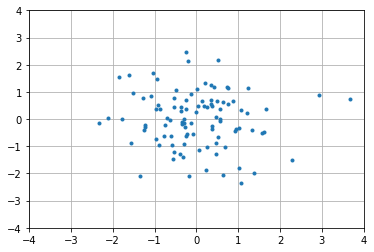

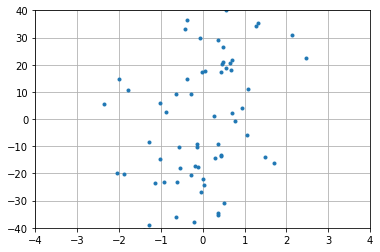

In [96]:
plt.plot(data[:,0],data[:,1], '.')
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.grid(True)
plt.show()
plt.plot(data[:,1],target, '.')
plt.xlim((-4,4))
plt.ylim((-40,40))
plt.grid(True)
plt.show()

In [97]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression

Генерируем тестовую выборку, шум ниже чем в предыдущем случае. Делаем масштабирование (стандартизацию).

In [98]:
data1_test, target_test, _ = datasets.make_regression(n_samples=100, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 1, coef = True, random_state = 20)
data1_test[:,0] = data1_test[:,0]*10
data_test = data1_test.copy() 
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data1_test.shape[0]):
    for j in range(data1_test.shape[1]):
        data_test[i][j] = (data_test[i][j] - means[j])/stds[j]

Обучение и предсказание:

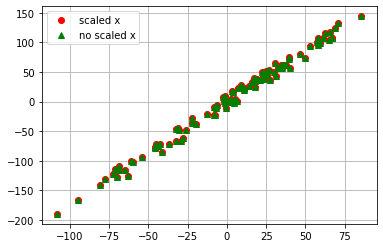

In [99]:
c_lr1 = LinearRegression().fit(data1,target)
c_lr = LinearRegression().fit(data,target)

y1 = c_lr1.predict(data1_test[:100,:])
y = c_lr.predict(data_test[:100,:])

plt.plot(y,target_test[:100],'or', label = 'scaled x')
plt.plot(y1,target_test[:100],'^g', label = 'no scaled x')
plt.legend()
plt.grid(True)
plt.show()

In [100]:
e1 = np.mean(np.abs(y-target_test))
e = np.mean(np.abs(y1-target_test))
e,e1

(26.860576815231198, 26.860576815231184)

Коэффициенты модели. Тут видим интересный момент. Коэффициенты абсолютно разные, что логично. Однако, в случае немасштабированных данных, мы не можем говорить о важности соответствующего признака в зависимости от значения коэффициента. Для масштабированных данных можем!

In [101]:
c_lr1.coef_, c_lr.coef_

(array([ 3.82268182, 17.53259014]), array([43.27070664, 17.94069306]))

## Стохастический градиентный спуск

Иногда бывает такая ситуация, что данных очень много. Обучение на этих данных очень ресурсозатратное. Одним из вариантов решения экономии ресурсов - Стохастический градиентный спуск.

Stochastic gradient descent, SGD

Вспомним метод градиентного спуска, рассмотренный ранее.

На каждой итерации приближение получается вычитанием из предыдущего вектора градиента, умноженного на некоторый шаг:


$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$

При этом выражение градиента в матричной форме выглядит так:

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

Если расписать $j$-ю компонетну этого градиента, то получим

$$\frac{\partial Q}{\partial w_{j}} = \frac{2}{l}\sum^{l}_{i=1}x^{j}_{i}(\left \langle w,x_{i} \right \rangle - y_{i}),$$

то есть суммирование по всем $l$ объектам обучающей выборки. Здесь выражение под суммой показывает, как нужно изменить $j$-й вес, чтобы как можно сильнее улучшить качество __на объекте $x_{i}$__, а вся сумма показывает, как нужно изменить вес, чтобы улучшить качество на __всей выборке__.

В этой формуле отражен один из главных недостатков градиентного спуска: если выборка большая по объему, то даже один шаг градиентного спуска будет занимать много вычислительных ресурсов и времени.

Стремление к оптимизации процесса привело к появлению _стохастического градиентного спуска_ (Stochastic gradient descent, SGD). Идея его основана на том, что на одной итерации мы вычитаем не вектор градиента, вычисленный по всей выборке, а вместо этого случайно выбираем один объект из обучающей выборки $x_{i}$ и вычисляем градиент только на этом объекте, то есть градиент только одного слагаемого в функционале ошибки и вычитаем именно этот градиент из текущего приближения вектора весов:

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, \{x_{i}\}),$$

то есть $\nabla Q(w^{k-1}, X)$ заменяется на $\nabla Q(w^{k-1}, \{x_{i}\})$.

Если в случае градиентного спуска мы стараемся на каждой итерации уменьшить ошибку на всей выборке, и по мере увеличения числа итераций ошибка падает монотонно, то в случае стохастического градиентного спуска мы уменьшаем на каждой итерации ошибку только на одном объекте, но при этом есть вероятность увеличить ее на другом объекте, поэтому график изменения ошибки может получаться немонотонным, и даже иметь пики (см. пример по ссылке [1] из списка литературы). То есть на какой-то итерации мы можем даже увеличить ошибку, но при этом в целом по ходу метода ошибка снижается, и рано или поздно мы выходим на нормальный уровень.

http://www.machinelearning.ru/wiki/index.php?title=%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA

__Пример:__

Реализуем стохастический градиентный спуск своими руками.

Отмасштабируем получившиеся признаки методом стандартизации.

In [102]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Подготовка данных и средств проверки закончена. Далее реализуем сам стохастический градиентный спуск.

In [103]:
# инициализируем начальный вектор весов
w = np.random.randn(2) # Это частный случай
 
# список векторов весов после каждой итерации
w_list = [w.copy()]
 
# список значений ошибок после каждой итерации
errors = []
 
# шаг градиентного спуска
eta = 0.001
 
# максимальное число итераций
max_iter = 1e3
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
lamb = 0.01 
np.random.seed(1234)

Q = [mserror(data, w, target)]  

Ход стохастического градиентного спуска

In [104]:
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta/(0+1) * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) #/target.shape[0]
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(data[train_ind], w) - target[train_ind])**2)
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 78.5774


Для стохастического градиентного спуска мы увеличили максимальное число итераций (max_iter) до 10000, что естественно, так как из-за специфики метода для достижения сходимости нужно большее количество шагов.

Также заметим что появился новый гиперпараметр: lamb - $\lambda$ - изменение ошибки Q

В итоге 2 гиперпараметра: $\lambda$ - скорость изменения ошибки,  $\eta$ - скорость обучения (скорость движения в направлении антиградиента), изменение весов

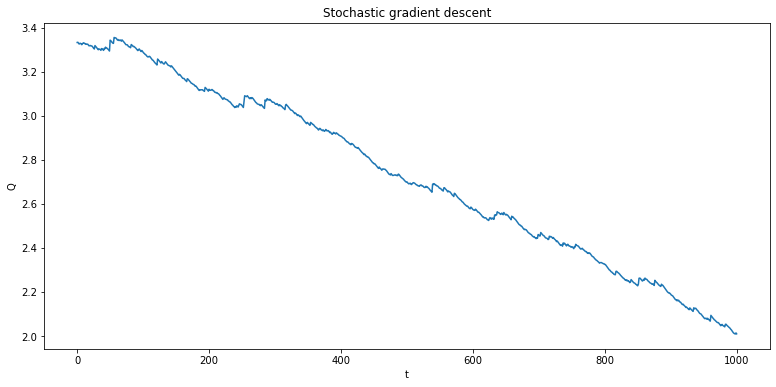

In [105]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel('t')
plt.ylabel('Q')

plt.plot(np.log10(Q))

plt.show()

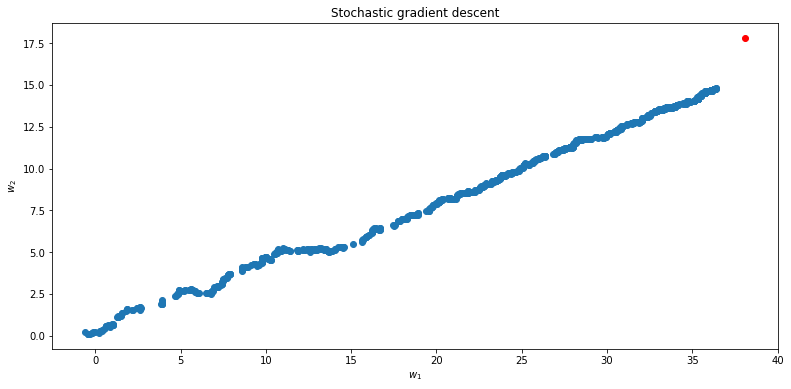

In [106]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
# plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

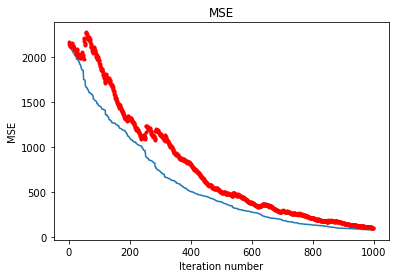

In [107]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)-1), errors[1:])
plt.plot(Q[1:],'r.')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Как и в случае градиентного спуска, вектор весов приближается к истинному. При этом падает и ошибка. Сравнить скорость ее падения для двух методов вам предстоит в домашнем задании.

Добиться лучшей скорости сходимости в методе стохастического градиентного спуска можно варьируя величину шага или используя методы, подбирающие ее адаптивно.

Среди преимуществ SGD можно выделить гораздо более быстрое вычисление одного шага по сравнению с обычным градиентным спуском и отсутствие необходимости хранить всю выборку в памяти при работе метода, что в свою очередь позволяет работать с очень большими выборками, которые невозможно поместить в память.

In [108]:
from  sklearn.linear_model import SGDClassifier , SGDRegressor

Теперь мы знаем MSE, MAE - ошибки. Алгоритмы оптимизации: GD, SGD, LSM (мнк). 

Модель машинного обучения: модель линейной регрессии, LR.

---
Заметки:

* Математическое ожидание стохастического градиентного спуска - градиентный спуск.

* Введен доп. параметр: $\lambda$ - степень влияния стохастики, чем выше тем меньше памяти и сильнее будут изменения (график будет более ломанным). Если он маленький, то график будет плавным.

Вывод: 

Для обучения модели на больших данных используется стохастический градиентный спуск, SGD.

Отличие: При SGD вычисление одного шага по 1 объекту выборки, при GD вычисление одного шага по всем объектам выборки =>

* Скорость обучения, $\eta$ в SGD должна быть ниже чем в GD
* Функционал ошибки Q

    GD:

$$Q_{GD}(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}}$$

$$\nabla_{w}Q_{GD}(w,X) = \frac{2}{l}X^{T}(Xw-y)$$

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q_{GD}(w^{k-1}, X)$$

$$w^{k} = w^{k-1} - \eta_{k}\frac{2}{l}X^{T}(Xw-y)$$

$$Q_{GD}^{k} = \frac{(Xw^{k}-y)^2}{l}$$

    SGD:

$x_{i}$ - случайный объект из обучающей выборки
$$Q_{SGD}(w, \{x_{i}\}) = ||x_{i}w-y||^{2}\rightarrow \underset{w}{\text{min}}$$

$$\nabla_{w}Q_{SGD}(w, \{x_{i}\}) = 2\cdot x_{i}^{T}(x_{i}w-y)$$

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q_{SGD}(w^{k-1}, \{x_{i}\})$$

$$w^{k} = w^{k-1} - 2\eta_{k}x_{i}^{T}(x_{i}w-y)$$

$$Q_{SGD}^{k} = Q^{k-1}(1-\lambda)+\lambda\cdot(x_{i}w^{k}-y)^2$$

Гипепараметры: 

* $\eta$ - скорость обучения (скорость движения в направлении антиградиента), изменение весов.

* $\lambda$ - степень влияния стохастики, чем выше тем меньше памяти и сильнее будут изменения (график будет более ломанным). Если он маленький, то график будет плавным.

---

## Переобучение и методы борьбы с ним

---

* Overfiting

Training error: 0.07<br>
Generalization error: 0.90 
* Underfiting

Training error: 0.4<br>
Generalization error: 0.42 
* Good fit

Training error: 0.14<br>
Generalization error: 0.17 

Точность на тестовой и тренировочной выборке должна быть примерно равной. В противном случае возникает переобучение или недообучение.

---

__Пример переобучения:__

Чтобы понять смысл переобучения и недообучения, начнем с примера. Допустим, у нас есть исходная известная зависимость 3-го порядка:

$$f(x) = 0.6 - 13.2x - 5.3 x^{2} - 4.17x^{3}.$$

Реализуем ее в виде python-функции и построим график.

In [109]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3

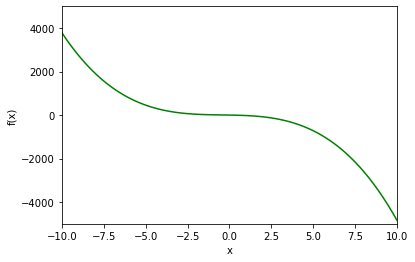

In [110]:
dots = np.linspace(-10, 10, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')

Теперь сгенерируем датасет из десяти случайных точек, подчиняющихся этой зависимости, с добавлением шума и нанесем на график.

In [111]:
np.random.seed(16)
x_data = np.random.uniform(-10, 10, 10)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 10)

In [112]:
x_data

array([-5.53417842,  0.46326683,  1.01402913, -9.087961  , -2.78542329,
       -5.53838117,  3.77452324, -6.7253715 , -8.59350266,  8.8202172 ])

In [113]:
np.reshape(x_data, (5, -1))

array([[-5.53417842,  0.46326683],
       [ 1.01402913, -9.087961  ],
       [-2.78542329, -5.53838117],
       [ 3.77452324, -6.7253715 ],
       [-8.59350266,  8.8202172 ]])

Данные готовы

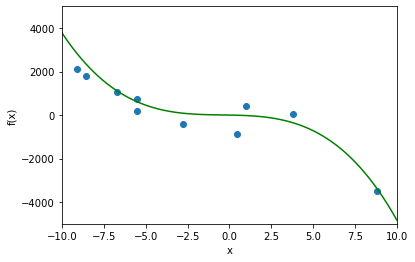

In [114]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

Теперь попробуем создать модель, способную восстановить исходную зависимость. Самым примитивным так называемый __константный алгоритм__, то есть модель вида 

$$a(x) = w_{0}.$$

Зависимость такой модели от признаков будет иметь вид горизонтальной прямой, что, очевидно, не обобщает нашу зависимость в должном виде (см. график ниже).

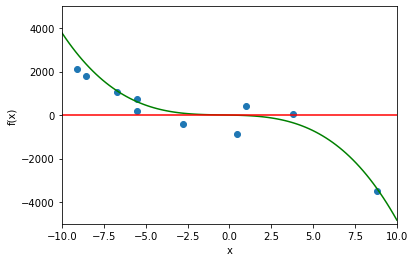

In [115]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, [dots.mean()]*len(dots), color='r')
plt.show()

Далее усложним семейство алгоритмов, применив линейную регрессию, которая в случае одного признака будет иметь вид 

$$a(x) = w_{0} + w_{1}x.$$

Обучим соответствующую модель, применив для этого методы python "из коробки" для работы с линейной регрессией.

In [119]:
from sklearn.linear_model import LinearRegression
# создадим модель
linear_regressor = LinearRegression( )

# обучим ее
linear_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

LinearRegression()

In [120]:
# выведем полученный вес при признаке и свободный коэффициент
print(linear_regressor.coef_[0], linear_regressor.intercept_)

-237.82400777158773 -411.9249993231067


Нанесем полученную после обучения модель на график

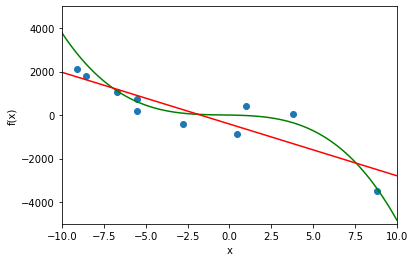

In [121]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, linear_regressor.predict(np.reshape(dots, (-1, 1))), color='r')

Мы обучили линейную модель, и видимо, что она, как и константная, плохо восстанавливает исходную зависимость. В данном случае можно говорить о __недообучении__. Хороший алгоритм не был построен, поскольку с помощью выбранного семейства алгоритмов невозможно восстановить исходную закономерность.

Усложним используемое семейство алгоритмов до кубической зависимости 

$$a(x) = w_{0} + w_{1}x + w_{2}x^{2} + w_{3}x^{3}.$$

Сделаем это путем искусственной генерации новой матрицы признаков, состоящей из исходных $x$, возведенных в степени до 3, используя `sklearn.preprocessing.PolynomialFeatures`. 

In [122]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# создадим новую кубическую модель
third_degree_regressor = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# обучим ее
third_degree_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [123]:
# выведем полученные веса при признаках и свободный коэффициент
print(third_degree_regressor.named_steps.linearregression.coef_)
print(third_degree_regressor.named_steps.linearregression.intercept_)


[ 0.         21.09882775 -7.90436131 -4.26313079]
-55.95265093706212


Нанесем полученную в итоге зависимость на график.

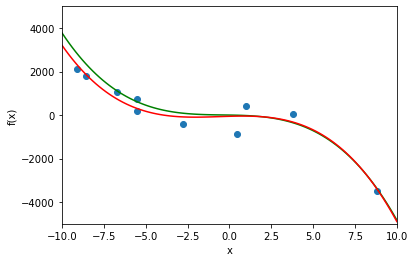

In [124]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, third_degree_regressor.predict(np.reshape(dots, (-1, 1))), color='r')

Полученный алгоритм достаточно хорошо описывает данные, но не идеально. И в реальных условиях может возникнуть вопрос, можно ли добиться лучшего совпадения увеличением сложности алгоритма.

Проиллюстрируем, что происходит в случае использования многочлена 8-й степени.

In [125]:
# создадим модель 8-й степени
eighth_degree_regressor = make_pipeline(PolynomialFeatures(degree=8), LinearRegression())

# обучим ее
eighth_degree_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=8)),
                ('linearregression', LinearRegression())])

Покажем получившийся график зависимости.

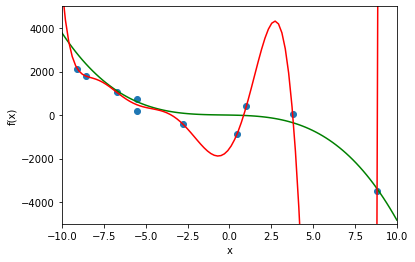

In [126]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, eighth_degree_regressor.predict(np.reshape(dots, (-1, 1))), color='r')

In [127]:
print(eighth_degree_regressor.named_steps.linearregression.coef_)
print(eighth_degree_regressor.named_steps.linearregression.intercept_)

[ 0.00000000e+00  1.07116179e+03  8.76325216e+02  4.03130196e+01
 -5.61701732e+01 -9.81320836e+00  9.56286206e-02  1.16554743e-01
  6.21060019e-03]
-1536.793909320273


Видно, что новая модель лучше описывает имеющиеся в обучающей выборке данные и дает фактически идеальные ответы на них, но про этом в целом зависимость сильно отличается от истинной. Поэтому если мы попробуем применить эту модель на новых данных, ответы будут расходиться с правильными. Такое явление и называется __переобучением__. Алгоритм слишком сильно подогнан под обучающую выборку, и за счет этого будет давать неадекватные ответы на новых точках.

Таким образом, недообучение несет за собой плохое качество на обучении и на новых данных, а переобучение - хорошее качество на обучении и плохое на новых данных.

Понятно, как бороться с недообучением - усложнять семейство алгоритмов. Возникает вопрос, как выявить переобучение и его избежать. В случае переобучения, как было сказано ранее, данные из обучающей выборки алгоритмом будут описываться хорошо, а новые данные - плохо, поэтому используя только обучающую выборку, невозможно заключить, хорошо обучен алгоритм или переобучен, так как оба они будут хорошо описывать известные данные.

Есть несколько методов оценки качества алгоритма и выявления переобучения:

1. Не использовать всю выборку для обучения, а откладывать часть данных для проверки полученного алгоритма. Это называется _отложенной выборкой_. Данные делятся на обучающую и тестовую выборку в соотношении, например, 0.7 к 0.3, и затем на первой части алгоритм обучается, а на второй проверяется. Размер отложенной выборки в данном случае нужно подбирать с осторожностью, так как слишком маленькая тестовая выборка не будет обеспечивать должной точности оценки качества обучения, а слишком маленькия обучающая выборка приведет к снижению качества обучения, так как будет малорепрезентативна. Таким образом, главный минус этого метода - сильная зависимость результата от того, как мы выбираем отложенную выборку. Например, в пространстве объектов могут быть какие-то особые, отличающиеся от остальных по какому-то свойству объекты, и может так произойти, что после разбиения они не попадут в обучающую выборку, алгоритм на них не обучится, и качество обучения после проверки на этих объектах, попавших в тестовую выборку, будет плохим. Один из путей решения этой проблемы - многократное случайное разбиение выборки на тестовую и обучающую и использование в качестве оценки качества среднего значения ошибки полученной после каждого разбиения. Но и этот метод не гарантирует, что каждый объект побывает в обучающей выборке, так как разбиения случайные.


2. _Кросс-валидация_ (усложненная версия метода отложенной выборки). Этот метод как раз вытекает из проблемы, описанной выше. Он является более системным подходом. В этом случае выборка разбивается на $k$ блоков, и затем каждый из них по очереди используется в качестве тестового, а остальная часть - в качестве обучающей выборки. После прохождения всей выборки таким образом получается $k$ показателей качества, и итоговая оценка качества обучения по кросс-валидации оценивается как средняя из этих $k$. В этом случае мы гарантируем, что все данные поучаствуют в обучении. Выбор количества блоков $k$ обычно зависит от размера выборки. Чем больше данных, тем меньше нужно блоков, так как во-первых в этом случае после разбиения даже на малое количество блоков у нас остается большой объем данных в обучающей выборке, что обеспечивает хорошее качество обучения, а во-вторых, разбиение на $k$ блоков означает обучение алгоритма $k$ раз, соответственно, чем их больше, тем больше получается вычислительная сложность процесса обучения модели. Обычно $k$ принимает значение от 3 до 10.


3. Использовать меры сложности модели, позволяющие без дополнительной выборки выявить переобучение.

Одним из знаков, что произошло переобучение модели, или _мерой сложности_ является получение больших по модулю весов при признаках. Посмотрим, что получилось в нашей последней модели.

In [128]:
# выведем полученные веса при признаках и свободный коэффициент
print(eighth_degree_regressor.named_steps.linearregression.coef_)
print(eighth_degree_regressor.named_steps.linearregression.intercept_)

[ 0.00000000e+00  1.07116179e+03  8.76325216e+02  4.03130196e+01
 -5.61701732e+01 -9.81320836e+00  9.56286206e-02  1.16554743e-01
  6.21060019e-03]
-1536.793909320273


Видим веса 2 и 3 порядков в то время как в кубичесой модели и в исходной зависимости ничего подобного не было. Это и говорит нам о том, что в данном случае имеет место переобучение.

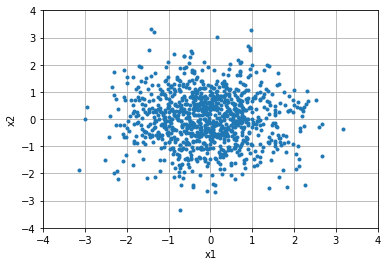

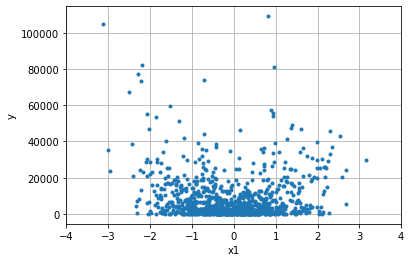

In [129]:
# сгенерируем набор данных
data2, target2, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 0.5, coef = True, random_state = 2)
target2 = target2 ** 2 + 1


plt.plot(data2[:,0],data2[:,1], '.')
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()
plt.plot(data2[:,0],target2, '.')
plt.xlim((-4,4))
plt.xlabel('x1')
plt.ylabel('y')
plt.grid(True)
plt.show()

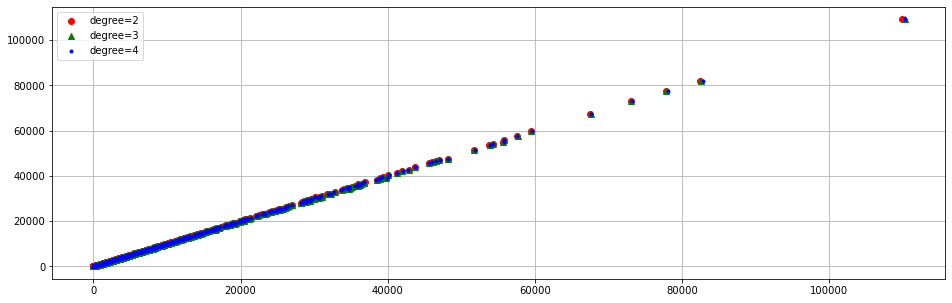

In [130]:
# отложенная выборка
N_split = 80

s = ('or','^g','.b','+k','or')
n = 1
plt.figure(figsize = (16,5))
for i,n in enumerate([2,3,4]):
    degree_regressor = make_pipeline(PolynomialFeatures(degree=n), LinearRegression())
    # обучим ее
    degree_regressor.fit(data2[:N_split,:], target2[:N_split])

    y = degree_regressor.predict(data2[N_split:,:])


    plt.plot(y,target2[N_split:],s[i], label = 'degree='+str(n))
plt.legend()
plt.grid(True)
plt.show()

In [111]:
e1 = np.mean(np.abs(y-target2[N_split:]))
e2 = np.mean((y-target2[N_split:])**2)
e3 = np.mean(np.abs(y-target2[N_split:])/target2[N_split:])
e1,e2,e3

(63.95559959126184, 12434.49012766574, 0.0773688595204459)

На этой особенности и основывается метод _регуляризации_ для борьбы с переобучением.

Переобучение:

* Cross-validation
* Hold Out
* Регуляризация

### Регуляризация

* Штраф сложности

* $L_{1}$ (lasso regression) - классический штраф сложности.

$$L_{1} = \sum_{i}(y_i-y(t_i))^{2} + \lambda \sum_{i}|a_i|$$

* $L_{2}$ (ridge regression) - классический штраф сложности.

$$L_{2} = \sum_{i}(y_i-y(t_i))^{2} + \lambda \sum_{i}a_{i}^{2}$$

Метод регуляризации заключается в "штрафовании" модели за слишком большие веса путем добавления нового члена к среднеквадратичной ошибке:

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

добавленный член $\lambda ||w||^{2}$ - _квадратичный регуляризатор_, который представляет собой $L_{2}$-норму вектора весов, то есть сумму квадратов весов $\sum^{d}_{j=1}w_{j}^{2}$, коэффицент $\lambda$ при нем - коэффициент регуляризации. Чем больше его значение, тем меньшая сложность модели будет получаться в процессе такого обучения. Если увеличивать его, в какой-то момент оптимальным для модели окажется зануление всех весов. В то же время при слишком низких его значениях появляется вероятность чрезмерного усложнения модели и переобучения. Выбор оптимального значения этого коэфициента является отдельной задачей и заключается в многократном обучении модели с разными его значениями и сравнении их качества.

---

Выяснение коэффициента регуляризации $\lambda$ это отдельная задача. 

Решение: Обучаем много раз модель с разными $\lambda$ и сравниваем качество

Суммируя:

* Выбор модели (Линейная регрессия, Логистическая, Ансамбль деревьев и т.д.)
* Оптимизация модели -> поиск оптимальных весов (SGD, GD, LSM). У каждого метода оптимизации также есть гиперпараметры ($\eta$ - скорость обучения, скорость спуска, $\lambda$ - уровень стохастичности,влияние новой ошибки на изменение старой)
* Проверка полученой модели на наличие переобучения: поиск оптимальных параметров модели относительно качества по тренировочной и валидационной выборке. Регуляризация. Поиск коэффициента регуляризации $\lambda$

Гиперпараметры: коэффициент регуляризации, коэффициент стохастичности (забывания), скорость обучения

---

По сути, смысл регуляризации заключается, как и в обычном обучении, в минимизации функционала ошибки, только в данном случае добавляется условие непревышения нормой вектора весов некоторого значения $||w||^{2}\leq C$, то есть ограничение весов, что и будет залогом избежания переобучения.

Описанный выше метод с использованием $L_{2}$-нормы вектора весов в качестве регуляризатора называется _$L_{2}$-регуляризацией_. По аналогии существует также _$L_{1}$-регуляризация_, использующая в качестве регуляризатора $L_{1}$-норму вектора весов, то есть сумму модулей весов.

$$||w||_{1} = \sum^{d}_{j=1}|w_{j}|.$$

$L_{2}$-регуляризатор представляет собой непрерывную гладкую функцию, поэтому его добавление не усложняет использование градиентных методов оптимизации, так как в каждой его точке существует производная. $L_{1}$-регуляризатор уже не является гладкой функцией, так как в нем есть модуль, у которого не существует производной в нуле. То есть его использование усложняет градиентные методы оптимизации, но в свою очередь он обладает интересной особенностью, заключающейся в занулении некоторых весов при его применении. Иными словами, он производит отбор признаков, позволяя оставлять только самые важные, отбрасывая остальные.

$L_{1}$-регуляризация также называется Lasso, $L_{2}$-регуляризация иногда называется Ridge. По этим именам регуляризаторы можно найти в модуле `sklearn.linear_models`.

__Пример:__

In [131]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [135]:
data2, target2, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 0.5, coef = True, random_state = 2)
target3 = np.sum(data2 ** 2,1) + 1
target3 = target3.reshape(-1,1)
n = 3
data3 = PolynomialFeatures(degree=n).fit_transform(data2)


In [136]:
data2[:3,:]

array([[ 0.37879447, -0.61837549],
       [-0.65293115, -1.06706712],
       [-1.06581629, -0.34682333]])

In [137]:
data3[:3,:]

array([[ 1.        ,  0.37879447, -0.61837549,  0.14348525, -0.23423721,
         0.38238824,  0.05435142, -0.08872776,  0.14484655, -0.23645951],
       [ 1.        , -0.65293115, -1.06706712,  0.42631908,  0.69672136,
         1.13863225, -0.27835701, -0.45491107, -0.74344846, -1.21499704],
       [ 1.        , -1.06581629, -0.34682333,  1.13596436,  0.36964996,
         0.12028643, -1.21072932, -0.39397895, -0.12820323, -0.04171814]])

In [138]:
data3.shape

(1000, 10)

In [139]:
# инициализируем начальный вектор весов
w = np.zeros((10,1))#np.random.randn(data3.shape[1]).reshape(-1,1) # Это частный случай
 
# список векторов весов после каждой итерации
w_list = [w.copy().T]
 
# список значений ошибок после каждой итерации
errors = []
 
# шаг градиентного спуска
eta = 0.15/100
 
# максимальное число итераций
max_iter = 1e2
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0

# коэффтцтень стохастичности, забывания
lamb = 0.01 

# коэффициент регуляризации
q = 100/100
np.random.seed(1234)

Q = [mserror(data3, w, target3)[0]]  
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data3.shape[0])
    
    #производная потерь, состоит из 2 частей
    dQ = np.dot(data3[train_ind:train_ind+1,:].T, (np.dot(data3[train_ind:train_ind+1,:], w) - target3[train_ind,0]))
    dL1 = np.sign(w) # производная для штрафа сложности
    
    new_w = w - 2 * eta * (dQ + q*dL1) #/ target3.shape[0] - нужно ставить небольшое значение скорости обучения
     
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data3, new_w, target3)[0])
    
    # посчитали новую ошибку с учетом нового и записали в лист
    Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(data3[train_ind,:], w) - target3[train_ind])**2) 

    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 2.8285


C:\Temp/ipykernel_12328/1135372540.py:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w_list = np.array(w_list)


Получилось хуже, потому что гиперпараметр коэффициент регуляризации подобран плохо :)

Полученные веса модели:

In [134]:
w

array([[ 0.31264221],
       [ 0.01403876],
       [-0.00369241],
       [ 0.61256275],
       [ 0.00645102],
       [ 0.59179386],
       [ 0.01360269],
       [ 0.02011139],
       [-0.14174317],
       [ 0.0125688 ]])

Как видим веса не очень большие и $L_{1}$ регуляризация как раз направлена на это. На то, чтобы веса были небольшими. 

В $L_{1}$ регуляризации есть еще одна фишка: __те признаки, веса которых приняли очень маленькой значения, являются незначительными!__

__ИТАК, ОСНОВНАЯ ЦЕЛЬ РЕГУЛЯРИЗАЦИИ: ПОНИЗИТЬ СЛОЖНОСТЬ МОДЕЛЬ.__

И поэтому с помощью регуляризации мы делаем нашу модель грубее, но при этом наша модель становится более устойчивой к новым данным (защита от переобучения).

### Коэффициент детерминации

Ошибка MSE, которую мы использовали для оценки качества модели имеет свои недостатки. Потери бывают разнородными все-таки. Из-за этого помимо абсолютной ошибки и среднеквадратичной, придуман коэффициент детерминации $R^2$ для оценки качества.

In [144]:
from sklearn.metrics import r2_score

_Коэффициент детерминации_ $R^{2}$ является еще одной метрикой качества в задачах регрессии. Ранее мы говорили о средней абсолютной и среднеквадратичной ошибке. Коэффициент детерминации позволяет развить тему среднеквадратичной ошибки, интерпретируя ее. 

MSE не позволяет сама по себе сделать вывод о том, как хорошо модель решает задачу. Например, если целевая переманная принимает значения от 0 до 1, а MSE равняется 10, это плохой показатель, а когда целевая переменная варьируется от 1000 до 10000, такое же значение уже является очень хорошим. Для избавления от такой неясности и был введен коэффициент детерминации, который по сути является нормированной среднеквадратичной ошибкой и принимает значения от 0 до 1.

$$R^{2} = 1 - \frac{\sum^{l}_{i=1}(a(x_{i}) - y_{i})^{2}}{\sum^{l}_{i=1}(y_{i} - \bar{y})^{2}},$$

где $\bar{y}=\frac{1}{l}\sum^{l}_{i=1}y_{i}$ - среднее значение целевой переменной.

Коэффициент детерминации характеризует, какую долю дисперсии ответов объясняет модель. Если $R^{2}=1$, то модель идеально описывает данные, если же $R^{2}$ близко к нулю, то предсказания сопоставимы по качеству с константной моделью.

In [140]:
degree_regressor = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
# обучим ее
degree_regressor.fit(data2[:N_split,:], target2[:N_split])
y = degree_regressor.predict(data2[N_split:,:])

In [141]:
np.sum((y - target2[N_split:] )**2)

267.6839997520756

In [142]:
np.sum((target2[N_split:]- np.mean(target2[N_split:]))**2)

7468537.841785819

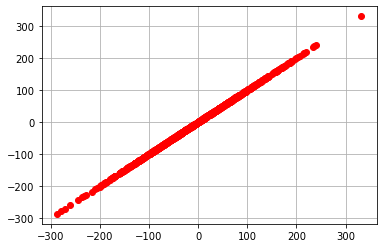

Коэффициент детерминации 0.9999641584463489
Коэффициент детерминации 0.9999641584463489


In [146]:
plt.plot(y,target2[N_split:],'or')

plt.grid(True)
plt.show()


r2 = 1 - np.sum((y - target2[N_split:] )**2)/np.sum((target2[N_split:]- np.mean(target2[N_split:]))**2)
print('Коэффициент детерминации', r2)
print('Коэффициент детерминации', r2_score(target2[N_split:], y))

## Литература

1. [Стохастический градиентный спуск](http://www.machinelearning.ru/wiki/index.php?title=%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)
2. [sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)
3. [numpy.mean](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.mean.html)
4. [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
5. [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
6. [sklearn.pipeline.make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

## Для самостоятельной работы

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.
2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE добавить норму весов, а в поправку нужно добавить производную для нормы вектора весов по весам) и сравнить результаты.

In [49]:
from sklearn.datasets import make_regression

In [50]:
datar,target = make_regression(1000,2)

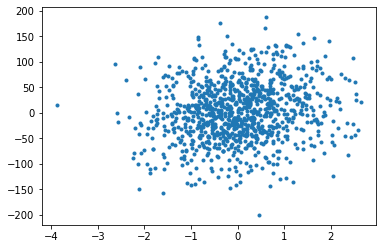

In [51]:
plt.plot(datar[:,0],target,'.')
plt.show()

---